# 대표적인 데이터 구조: 링크드 리스트 (Linked List)

## 1. 링크드 리스트 (Linked List) 구조
* 연결 리스트라고도 함
* 배열은 순차적으로 연결된 공간에 데이터를 나열하는 데이터 구조
* 링크드 리스트는 떨어진 곳에 존재하는 데이터를 화살표로 연결해서 관리하는 데이터 구조
* <font color='#BF360C'>본래 C언어에서는 주요한 데이터 구조이지만, 파이썬은 리스트 타입이 링크드 리스트의 기능을 모두 지원</font>

* 링크드 리스트 기본 구조와 용어
  - 노드(Node): 데이터 저장 단위 (데이터값, 포인터) 로 구성
  - 포인터(pointer): 각 노드 안에서, 다음이나 이전의 노드와의 연결 정보를 가지고 있는 공간

<br>
* 일반적인 링크드 리스트 형태

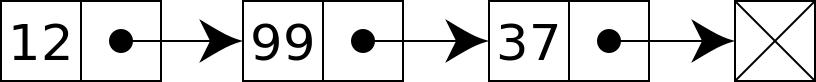

In [11]:
#!pip install IPython
from IPython.display import Image
Image("https://www.fun-coding.org/00_Images/linkedlist.png")
# (출처:wikipedia, https://en.wikipedia.org/wiki/Linked_list)

## 2. 간단한 링크드 리스트 예

#### Node 구현
- 보통 파이썬에서 링크드 리스트 구현시, 파이썬 클래스를 활용함
  - 파이썬 객체지향 문법 이해 필요
  - 참고: https://www.fun-coding.org/PL&OOP1-3.html

In [12]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

In [14]:
# 아래와 같이, next에 올 Node객체도 함께 전달할 수 있는 형식으로 class를 구현하는 것이 좋다.
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

#### Node와 Node 연결하기 (포인터 활용)

In [15]:
node1 = Node(1)
node2 = Node(2)
node1.next = node2
head = node1  # 가장 앞의 노드를 나타내는 변수를 선언 및 노드 할당

#### 링크드 리스트로 데이터 추가하기

In [17]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

def add(data):
    # 가장 앞의 노드부터 링크드 리스트를 순회할 것이므로, head를 node변수에 할당
    node = head 
    # 다음 노드가 있으면 다음 노드를 node에 재할당 다음 노드가 none이 될 때까지 반복
    while node.next: 
        node = node.next
    # 마지막 노드(none)에 도달하면, next에 data를 값으로 갖는 Node객체 할당
    node.next = Node(data)

In [18]:
node1 = Node(1)
head = node1
for index in range(2, 10):
    add(index)

#### 링크드 리스트 데이터 출력하기(검색하기)

In [19]:
node = head
while node.next:
    print(node.data)
    node = node.next
print (node.data)

1
2
3
4
5
6
7
8
9


## 3. 링크드 리스트의 장단점 (전통적인 C언어에서의 배열과 링크드 리스트)
* 장점
  - 미리 데이터 공간을 미리 할당하지 않아도 됨
    - 링크드 리스트는 미리 할당된 공간 속에서 자료를 추가/삭제하는 것이 아니라, 다음 노드의 위치를 가리키는 주소를 값으로 가지고 있기 때문에, 이부분만 수정해주면 되기 때문.
    - 링크드 리스트는 서로 떨어져 있는 자료들을 주소를 기준으로 서로 참조해주는 것.
    - 배열은 **미리 데이터 공간을 할당** 해야 함
* 단점
  - 연결을 위한 별도 데이터 공간이 필요하므로, 저장공간 효율이 높지 않음
  - 연결 정보를 찾는 시간이 필요하므로 접근 속도가 느림
  - 중간 데이터 삭제시, 앞뒤 데이터의 연결을 재구성해야 하는 부가적인 작업 필요

## 4. 링크드 리스트의 복잡한 기능1 (링크드 리스트 데이터 사이에 데이터를 추가)
- 링크드 리스트는 유지 관리에 부가적인 구현이 필요함
<br>
<image src="https://www.fun-coding.org/00_Images/linkedlistadd.png"/>

In [24]:
# 현재 링크드 리스트의 구조를 확인하기
node = head
while node.next:
    print(node.data)
    node = node.next
print (node.data)

1
2
3
4
5
6
7
8
9


In [26]:
# 링크드 리스트 값들의 중간에 삽입할 Node객체 생성
node3 = Node(1.5)

In [27]:
node = head
search = True
while search:
    if node.data == 1:
        search = False
    else:
        node = node.next

node_next = node.next # 원래 1의 값을 갖는 노드의 다음 객체를 따로 변수에 저장해둔 뒤,
node.next = node3 # 1의 값을 갖는 노드의 다음 노드로 새로운 노드를 할당
node3.next = node_next # 새로 삽입된 노드의 다음 노드에 따로 저장해 두었던 원래 노드의 다음 노드를 할당

In [28]:
# 새로운 노드가 적절한 위치에 연결되었는지 확인
node = head
while node.next:
    print(node.data)
    node = node.next
print (node.data)

1
1.5
2
3
4
5
6
7
8
9


## 5. 파이썬 객체지향 프로그래밍으로 링크드 리스트 구현하기

In [29]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next
    
class NodeMgmt:
    def __init__(self, data):
        self.head = Node(data)
        
    def add(self, data):
        if self.head == '':
            self.head = Node(data)
        else:
            node = self.head
            while node.next:
                node = node.next
            node.next = Node(data)
        
    def desc(self):
        node = self.head
        while node:
            print (node.data)
            node = node.next

In [30]:
linkedlist1 = NodeMgmt(0)
linkedlist1.desc()

0


In [31]:
for data in range(1, 10):
    linkedlist1.add(data)
linkedlist1.desc()

0
1
2
3
4
5
6
7
8
9


## 6. 링크드 리스트의 복잡한 기능2 (특정 노드를 삭제)
* 다음 코드는 위의 코드에서 delete 메서드만 추가한 것이므로 해당 메서드만 확인하면 됨

In [46]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next
    
class NodeMgmt:
    def __init__(self, data):
        self.head = Node(data)
        
    def add(self, data):
        if self.head == '':
            self.head = Node(data)
        else:
            node = self.head
            while node.next:
                node = node.next
            node.next = Node(data)
        
    def desc(self):
        node = self.head
        if node:
            while node:
                print (node.data)
                node = node.next
        else:
            print('There is no existing Node in LinkedList')
    
    def delete(self, data):
        if self.head == '':
            print ("해당 값을 가진 노드가 없습니다.")
            return
        
        if self.head.data == data:
            temp = self.head # headNode객체의 주소값을 참조하는 변수 temp
            self.head = self.head.next
            del temp # temp가 참조하고 있는 주소의 객체 headNode를 메모리에서 삭제함
        else:
            node = self.head
            while node.next:
                if node.next.data == data:
                    temp = node.next
                    node.next = node.next.next
                    del temp
                    return
                else:
                    node = node.next

#### 테스트를 위해 1개 노드를 만들어 봄

In [47]:
linkedlist1 = NodeMgmt(0)
linkedlist1.desc()

0


#### head 가 살아있음을 확인

In [48]:
linkedlist1.head

#### head 를 지워봄(위에서 언급한 경우의 수1)

In [49]:
linkedlist1.desc() # 현재 있는 노드의 값 0 을 반환
linkedlist1.delete(0)
linkedlist1.desc() # 더이상 노드가 없으므로 반환값이 없음

0
There is no existing Node in LinkedList


#### 다음 코드 실행시 아무것도 안나온다는 것은 linkedlist1.head 가 정상적으로 삭제되었음을 의미

In [50]:
linkedlist1.head

#### 다시 하나의 노드를 만들어봄

In [51]:
linkedlist1 = NodeMgmt(0)
linkedlist1.desc()

0


#### 이번엔 여러 노드를 더 추가해봄

In [52]:
for data in range(1, 10):
    linkedlist1.add(data)
linkedlist1.desc()

0
1
2
3
4
5
6
7
8
9


#### 노드 중에 한개를 삭제함 (위에서 언급한 경우의 수2)

In [53]:
linkedlist1.delete(4)

#### 특정 노드가 삭제되었음을 알 수 있음

In [54]:
linkedlist1.desc()

0
1
2
3
5
6
7
8
9


In [55]:
linkedlist1.delete(9)

In [56]:
linkedlist1.desc()

0
1
2
3
5
6
7
8


<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습1: 위 코드에서 노드 데이터가 2인 노드 삭제해보기</font></strong>
</div>

In [64]:
node_mgmt = NodeMgmt(0)
for i in range(1,11):
    node_mgmt.add(i)
node_mgmt.desc()
node_mgmt.delete(2)
print()
node_mgmt.desc()

0
1
2
3
4
5
6
7
8
9
10

0
1
3
4
5
6
7
8
9
10


<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습2: 위 코드에서 노드 데이터가 특정 숫자인 노드를 찾는 함수를 만들고, 테스트해보기</font></strong><br>
테스트: 임의로 1 ~ 9까지 데이터를 링크드 리스트에 넣어보고, 데이터 값이 4인 노드의 데이터 값 출력해보기
</div>

In [67]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class NodeMgmt:
    def __init__(self, data):
        self.head = Node(data)
    
    def add(self, data):
        if self.head == '':
            self.head = Node(data)
        else:
            node = self.head
            while node.next:
                node = node.next
            node.next = Node(data)

    def desc(self):
        node = self.head
        while node:
            print (node.data)
            node = node.next

    def delete(self, data):
        if self.head == '':
            print ('해당 값을 가진 노드가 없습니다.')
            return

        # 경우의 수1: self.head를 삭제해야할 경우 - self.head를 바꿔줘야 함
        if self.head.data == data: 
            # self.head 객체를 삭제하기 위해, 임시로 temp에 담아서 객체를 삭제했음
            temp = self.head 
            # 만약 self.head 객체를 삭제하면, 이 코드가 실행이 안되기 때문!
            self.head = self.head.next 
            del temp
        else:
            node = self.head
            
            # 경우의 수2: self.head가 아닌 노드를 삭제해야할 경우
            while node.next: 
                if node.next.data == data:
                    temp = node.next
                    node.next = node.next.next       
                    del temp                         
                    pass                             
                else:
                    node = node.next
                    
    def search_node(self, data):
        node = self.head
        while node:
            if node.data == data:
                return node
            else:
                node = node.next

In [ ]:
# 테스트
node_mgmt = NodeMgmt(0)
for data in range(1, 10):
    node_mgmt.add(data)

node = node_mgmt.search_node(4)
print (node.data)

## 7. 다양한 링크드 리스트 구조 
* 더블 링크드 리스트(Doubly linked list) 기본 구조 
  - 이중 연결 리스트라고도 함
  - 장점: 양방향으로 연결되어 있어서 노드 탐색이 양쪽으로 모두 가능
  <br>
<img src="https://www.fun-coding.org/00_Images/doublelinkedlist.png" />
(출처: wikipedia, https://en.wikipedia.org/wiki/Linked_list)

In [72]:
class Node():
    def __init__(self, data, prev=None, next=None):
        self.prev = prev
        self.data = data
        self.next = next
class double_linked_list():
    def __init__(self, data):
        self.head = Node(data)
        self.tail = self.head
    
    def insert(self, data):
        if self.head == None: # 이런 경우는 없겠지만, 방어용 코드로서 작성하는 편이다.
            self.head = Node(data)
            self.tail = self.head
        else:
            cur_node = self.head
            while cur_node.next:
                cur_node = cur_node.next
            new_node = Node(data)
            cur_node.next = new_node
            new_node.prev = cur_node
            self.tail = new_node
        
    def desc(self):
        if self.head == None:
            print('There is nothing in this DoubleLinkedList!')
        else:
            cur_node = self.head
            while cur_node:
                print(cur_node.data)
                cur_node = cur_node.next


In [73]:
double_linked_list = double_linked_list(0)
for data in range(1,11):
    double_linked_list.insert(data)

double_linked_list.desc()

0
1
2
3
4
5
6
7
8
9
10


<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습3: 위 코드에서 노드 데이터가 특정 숫자인 노드 앞에 데이터를 추가하는 함수를 만들고, 테스트해보기</font></strong><br>
- 더블 링크드 리스트의 tail 에서부터 뒤로 이동하며, 특정 숫자인 노드를 찾는 방식으로 함수를 구현하기<br>
- 테스트: 임의로 0 ~ 9까지 데이터를 링크드 리스트에 넣어보고, 데이터 값이 2인 노드 앞에 1.5 데이터 값을 가진 노드를 추가해보기
</div>

In [110]:
class Node():
    def __init__(self, data, prev=None, next=None):
        self.prev = prev
        self.data = data
        self.next = next
class double_linked_list():
    def __init__(self, data):
        self.head = Node(data)
        self.tail = self.head
    
    def insert(self, data):
        if self.head == None: # 이런 경우는 없겠지만, 방어용 코드로서 작성하는 편이다.
            self.head = Node(data)
            self.tail = self.head
        else:
            cur_node = self.head
            while cur_node.next:
                cur_node = cur_node.next
            new_node = Node(data)
            cur_node.next = new_node
            new_node.prev = cur_node
            self.tail = new_node
        
    def desc(self):
        if self.head == None:
            print('There is nothing in this DoubleLinkedList!')
        else:
            cur_node = self.head
            while cur_node:
                print(cur_node.data)
                cur_node = cur_node.next
    def search_from_head(self, data):
        if self.head == None:
            # 더블링크드 리스트가 아무런 노드도 갖고 있지 않을때,
            return False

        cur_node = self.head
        while cur_node:
            # 현재 노드의 값이 찾고자 하는 값이라면 현재 노드 반환
            if cur_node.data == data:return cur_node 
            # 아니라면, 다음 노드로 이동
            else: 
                cur_node = cur_node.next
        # while문을 통해 모든 노드를 순회했음에도 함수가 끝나지 않았음 == 값이 없음
        return False

    def search_from_tail(self, data):
        if self.head == None:
            # 더블링크드 리스트가 아무런 노드도 갖고 있지 않을때,
            return False
        
        cur_node = self.tail
        while cur_node:
            if cur_node.data == data:
                return cur_node
            else:
                cur_node = cur_node.prev
        return False

    def insert_before(self, data, before_data):    
        # 만약 더블링크드리스트가 빈 값이라면, head와 tail을 새로운 노드로 설정
        if self.head == None:
            self.head = Node(data)
            self.tail = self.head
            return True
        
        # 꼬리쪽에서 부터 탐색(특정한값(찾고자하는 값) 앞부분에 새로운 값을 삽입하려고 하므로)
        else:
            cur_node = self.tail
            while cur_node.data != before_data:
                cur_node = cur_node.prev
                # 만약 특정한 값(찾고자 하는 값)이 없으면 앞부분에 삽입할 수 없으므로 False
                if cur_node == None:
                    return False
            # while문을 return을 거치지 않고 빠져나왔다는 것은 현재 노드의 값이 찾고자하는 특정한 값과 같으므로, 아래의 코드블록을 실행
            new_node = Node(data)
            before_new = cur_node.prev
            if before_new == None:
                self.head = new_node
            else:
                # 원래 특정한 값의 앞에 있던 노드의 뒷노드로  삽입하고자 하는 새로운 노드를,
                # 새로운 노드의 앞 노드로, 해당 노드를 설정
                before_new.next = new_node
                new_node.prev = before_new
            # 새로운 노드의 뒷노드로, 특정한 값을 갖는 노드로,
            # 특정한 값을 갖는 노드의 앞노드로, 새로운 노드로 설정
            new_node.next = cur_node
            cur_node.prev = new_node
            return True

In [111]:
double_linked_list = double_linked_list(0)
for data in range(1, 10):
    double_linked_list.insert(data)
double_linked_list.desc()

0
1
2
3
4
5
6
7
8
9


In [112]:
node_3 = double_linked_list.search_from_tail(3)
print(node_3.data)

node_4 = double_linked_list.search_from_head(4)
print(node_4.data)

3
4


In [113]:
double_linked_list.insert_before('very first node', 0)
double_linked_list.insert_before(1.5, 2)
double_linked_list.insert_before(4.5, 5)
double_linked_list.desc()


very first node
0
1
1.5
2
3
4
4.5
5
6
7
8
9


In [114]:
node_3 = double_linked_list.search_from_tail(1.5)
node_3.data

1.5

<div class="alert alert-block alert-warning">
<strong><font color="blue" size="3em">연습4: 위 코드에서 노드 데이터가 특정 숫자인 노드 뒤에 데이터를 추가하는 함수를 만들고, 테스트해보기</font></strong><br>
- 더블 링크드 리스트의 head 에서부터 다음으로 이동하며, 특정 숫자인 노드를 찾는 방식으로 함수를 구현하기<br>
- 테스트: 임의로 0 ~ 9까지 데이터를 링크드 리스트에 넣어보고, 데이터 값이 1인 노드 다음에 1.7 데이터 값을 가진 노드를 추가해보기
</div>

In [120]:
class Node:
    def __init__(self, data, prev=None, next=None):
        self.prev = prev
        self.data = data
        self.next = next

class NodeMgmt:
    def __init__(self, data):
        self.head = Node(data)
        self.tail = self.head
    
    def insert_before(self, data, before_data):
        if self.head == None:
            self.head = Node(data)
            return True            
        else:
            node = self.tail
            while node.data != before_data:
                node = node.prev
                if node == None:
                    return False
            new = Node(data)
            before_new = node.prev
            if before_new == None:
                self.head = new
            else:
                before_new.next = new
            new.next = node
            return True

    def insert_after(self, data, after_data):
        if self.head == None:
            self.head = Node(data)
            return True            
        else:
            node = self.head
            while node.data != after_data:
                node = node.next
                if node == None:
                    return False
            new = Node(data)
            after_new = node.next
            if after_new == None:
                self.tail = new
            else:
                after_new.prev = new
                new.next = after_new
            new.prev = node
            node.next = new
            return True

    def insert(self, data):
        if self.head == None:
            self.head = Node(data)
        else:
            node = self.head
            while node.next:
                node = node.next
            new = Node(data)
            node.next = new
            new.prev = node
            self.tail = new

    def desc(self):
        node = self.head
        while node:
            print (node.data)
            node = node.next

In [121]:
node_mgmt = NodeMgmt(0)
for data in range(1, 10):
    node_mgmt.insert(data)

node_mgmt.desc()
print()
node_mgmt.insert_after(1.5, 1)
node_mgmt.insert_after("very last node", 9)
node_mgmt.desc()

0
1
2
3
4
5
6
7
8
9

0
1
1.5
2
3
4
5
6
7
8
9
very last node
